In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [2]:
%run run_gnode.py

mode: GPU
{
  "resume": false, 
  "exp_name": "exp18_toy_full_split_with_cutoff_thresholds", 
  "hyperparams": "base/hyperparams.py", 
  "weights": "iter", 
  "tensorboard": false, 
  "gpu": "1", 
  "delete": []
}
loading HP from file
importing hyperparams base.hyperparams


[exp18_toy_full_split_with_cutoff_thresholds: run_gnode.py:  69] WARNING: <module>(): Deleting Logs...
[exp18_toy_full_split_with_cutoff_thresholds: run_gnode.py:  79] INFO: <module>(): Created directories


[exp18_toy_full_split_with_cutoff_thresholds: utils.py:  45] INFO: create_child_node(): Child Node node0 created from None


In [13]:
root = GNode.load('toy_root_disc_z.pickle', root)

In [37]:
z = tr.tensor(np.random.normal(0, 1, (8000, 2)).astype('float32'))

In [38]:
x_gen = root.gan.decode(z)

In [39]:
from utils import viz_utils

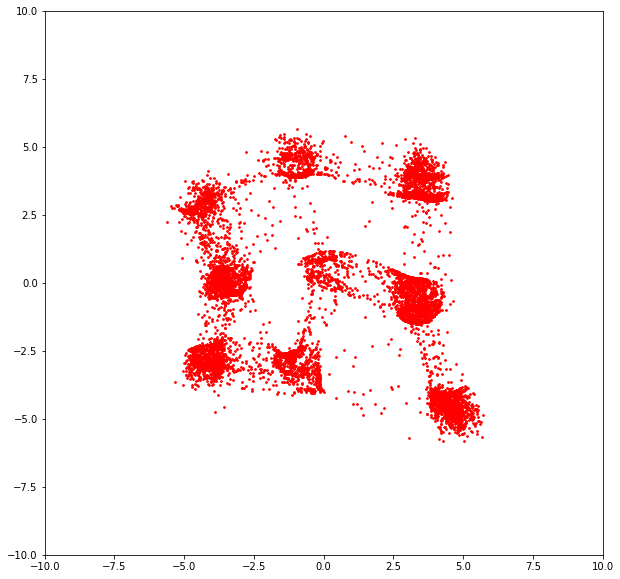

In [40]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
viz_utils.scatter_2d(ax, x_gen, c='red', s=3.0)
fig.savefig('root_gen')

In [30]:
! ls | grep png

root_gen.png


In [13]:
dl_set[6].data['train'].shape

(1, 2)

In [16]:
tree[4].gan.sample((2048,)).shape

torch.Size([2048, 2])

In [3]:
import pickle
node0 = load_node('node0', 'full_fit') 
node1 = load_node('node1', 'full_fit')
node2 = load_node('node2', 'full')
node3 = load_node('node3', 'full')
node4 = load_node('node4', 'full')

In [4]:
node0.set_child_nodes([node1, node2])
node1.set_child_nodes([node3, node4])

In [5]:
tree = GanTree.create_from_root(node0, 'gtree', H )

In [5]:
# split_dataloader(node0)
split_dataloader(tree[2])

In [4]:
%matplotlib inline

In [8]:
train_phase_1(node, 1000)

[exp16_toy_full_split_trial: run_gnode.py: 321] INFO: train_phase_1(): Training X-CLF (Phase 1) on node2
100%|██████████| 1000/1000 [00:28<00:00, 34.69it/s]


In [6]:
seed_data[4]

[tensor([[3.7011, 4.0355],
         [3.6507, 4.2069],
         [3.3402, 4.8607],
         ...,
         [3.6161, 4.5401],
         [3.7049, 4.8111],
         [4.2645, 3.5884]]), tensor([8, 8, 8,  ..., 8, 8, 8])]

IndexError: list index out of range

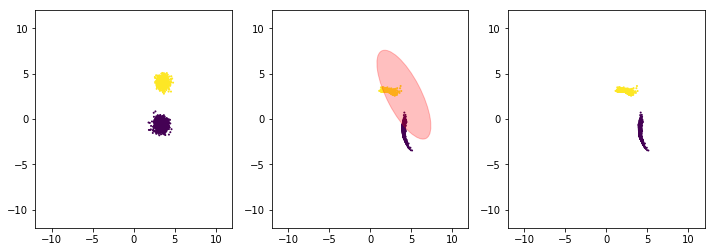

In [8]:
i = 3
node = tree[i]
xdata, labels = seed_data[i]
zdata = node.pre_gmm_encode(xdata)
zdata_ = node.post_gmm_encode(xdata)

data = [xdata, zdata, zdata_]

fig = plt.figure(figsize=(12, 4))
ax = fig.subplots(1, 3)
for i, a in enumerate(ax):
    a.set_xlim(-12, 12)
    a.set_ylim(-12, 12)
    a.scatter(data[i][:, 0], data[i][:, 1], s=1, c=labels, cmap='viridis')

params = node.dist_params

ax[1].add_artist(node.ellipse)
ax[2].add_artist(node.left.ellipse)
ax[2].add_artist(node.right.ellipse)

In [25]:
node0.gmm = gmm
node0.gmm.fit(np.random.normal(0, 1, (100, 2)))
node0.save('temp.pt')
nodei = GNode.load('9g_root.pickle', Model=node0.gan.__class__)

In [26]:
nodei.gmm

Started tensorboard at http://10.24.32.52:8001


In [4]:
pk = pickle.load(open(file))

In [10]:
type(x_seed)
node0.fit_gmm(x_seed)

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
gmm = GaussianMixture(1, means_init=np.array([[1000,1000]]), max_iter=1000)
# gmm.fit(np.random.normal(0, 1, (10000, 2)))

In [57]:
gmm.means_
# gmm.set_params(means=np.array([0,0]))

AttributeError: 'GaussianMixture' object has no attribute 'means_'

In [17]:
split_dataloader(node0)

z = node0.post_gmm_encode(tr.tensor(x_seed, dtype=tr.float32))

IndexError: list index out of range

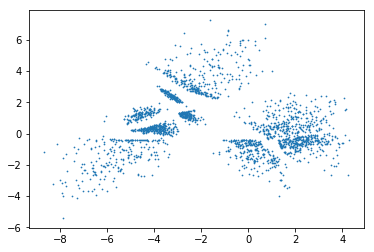

In [28]:
%matplotlib inline
# z_batch = root.post_gmm_encode(x_batch)
ax = plt.gca()
# viz_utils.scatter_2d(ax, x_batch)
viz_utils.scatter_2d(ax, z)

In [4]:
import numpy as np
import torch as tr
from matplotlib import pyplot as plt

In [6]:
gnode = root

In [7]:
x_batch, _ = dl.random_batch('train', 2048)
z_batch = gnode.gan.encode(x_batch, transform=False)

x_splits, _ = gnode.split_x(x_batch)
z_splits, _ = gnode.split_z(z_batch)
a, b = x_splits[1], x_splits[2]
x_recon = gnode.gan.reconstruct_x(x_batch)

In [7]:
R = np.random.rand(10, 2)

In [90]:
# Testing some scratchpad code
Z = tr.rand(100, 2)
dummy = tr.zeros_like(Z)
p = tr.argmax(tr.rand(100, 2), dim=-1, keepdim=True)

print p.shape, Z.shape

z1 = tr.where(p == 0.0, Z, dummy)
z2 = tr.where(p == 1.0, Z, dummy)



print z1.shape, z2.shape

torch.Size([100, 1]) torch.Size([100, 2])
torch.Size([100, 2]) torch.Size([100, 2])


In [8]:
z_probs = gnode.predict_z(z_batch, probs=True)

In [9]:
np.ones(10).__class__

numpy.ndarray

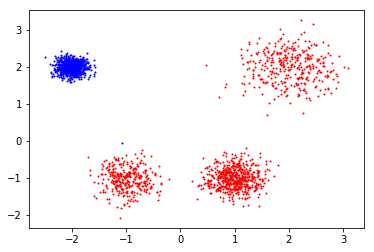

In [10]:
plt.scatter(a[:, 0], a[:, 1], 1, color='red')
plt.scatter(b[:, 0], b[:, 1], 1, color='blue')

In [11]:
from utils import  viz_utils

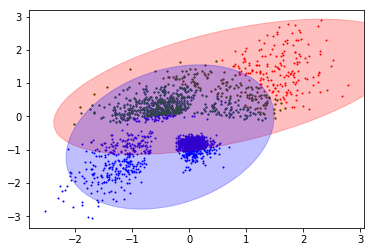

In [14]:
ax = plt.gca()
z_mix = z_batch[np.where(z_probs.min(axis=-1) > 0.1)]
ax.scatter(z_splits[1][:, 0], z_splits[1][:, 1], s=1, color='red')
ax.scatter(z_splits[2][:, 0], z_splits[2][:, 1], s=1, color='blue')
ax.scatter(z_mix[:, 0], z_mix[:, 1], s=1, color='green')


e1 = viz_utils.get_ellipse(gnode.gmm.means_[0], gnode.gmm.covariances_[0], scales=3, color='red')
e2 = viz_utils.get_ellipse(gnode.gmm.means_[1], gnode.gmm.covariances_[1], scales=3, color='blue')

ax.add_artist(e1)
ax.add_artist(e2)

In [29]:
root.child_ids

[1, 2]

In [24]:
dl_candidate = {

}

dl_set = {
    0: dl
}

child_nodes = tree.split_node(root, fixed=False)

[exp14_node_split: utils.py:  58] INFO: split_node(): Starting Split Process: <GNode[name=node0 id=0 parent_id=-1]>
[exp14_node_split: utils.py:  60] INFO: split_node(): Gaussian Mixture Fitted
[exp14_node_split: utils.py:  44] INFO: create_child_node(): Child Node node1 created
[exp14_node_split: utils.py:  45] INFO: create_child_node(): Node parameters: 
[exp14_node_split: utils.py:  46] INFO: create_child_node(): prior_means: [-0.97073511 -0.46587559]
[exp14_node_split: utils.py:  47] INFO: create_child_node(): prior_cov  : [[0.14248662 0.28321923]
 [0.28321923 0.96310543]]
[exp14_node_split: utils.py:  48] INFO: create_child_node(): cond_prob  : 0.118417510455
[exp14_node_split: utils.py:  49] INFO: create_child_node(): abs_prob   : 0.118417510455
[exp14_node_split: utils.py:  44] INFO: create_child_node(): Child Node node2 created
[exp14_node_split: utils.py:  45] INFO: create_child_node(): Node parameters: 
[exp14_node_split: utils.py:  46] INFO: create_child_node(): prior_means:




{1: <GNode[name=node1 id=1 parent_id=0]>, 2: <GNode[name=node2 id=2 parent_id=0]>}


KeyError: 1

In [33]:
nodes = {node.id: node for node in child_nodes}  # type: dict[int, GNode]

print(nodes)

nodes[1].set_trainer(dl_set[1], H, train_config)

nodes[2].set_trainer(dl_set[2], H, train_config)

[exp14_node_split: bash_utils.py:  10] INFO: exec_cmd(): mkdir -p ../experiments/exp14_node_split/weights/iter/node1
[exp14_node_split: bash_utils.py:  10] INFO: exec_cmd(): mkdir -p ../experiments/exp14_node_split/weights/best/node1


{1: <GNode[name=node1 id=1 parent_id=0]>, 2: <GNode[name=node2 id=2 parent_id=0]>}


[exp14_node_split: bash_utils.py:  10] INFO: exec_cmd(): mkdir -p ../experiments/exp14_node_split/weights/iter/node2
[exp14_node_split: bash_utils.py:  10] INFO: exec_cmd(): mkdir -p ../experiments/exp14_node_split/weights/best/node2
Process PoolWorker-13:
Process PoolWorker-15:
Process PoolWorker-14:
Traceback (most recent call last):
Process PoolWorker-16:
Process PoolWorker-18:
Process PoolWorker-17:
Process PoolWorker-19:
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process PoolWorker-20:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/proc

In [49]:
def relabel():
    candidate_data_dict = {
        split: root.filter_x(dl.data[split], prob_threshold=0.01)
        for split in ['train', 'test']
    }
    
    print candidate_data_dict['train'].shape, candidate_data_dict['test'].shape

    full_data_tuples = get_data_tuple(dl.data, dl.labels)
    candidate_data_tuples = get_data_tuple(candidate_data_dict)

    for i in root.child_ids:
        dl_set[i] = CustomDataLoader.create_from_parent(dl, full_data_tuples[i])
        dl_candidate[i] = CustomDataLoader.create_from_parent(dl, candidate_data_tuples[i])
        


In [34]:
def mini_train_step():
    root.gmm_fit(x_batch, 2)
    for mini_iter_no in range(20):
        # Training common encoder over cross-classification loss with a batch across common dataloader
        x_clf_train_batch, _ = dl_set[0].next_batch('train')
        loss = root.step_train_x_clf(x_clf_train_batch)

        z_train_ae_batches = root.sample_restricted_z_batch(dl_set[0].batch_size['train'], prob_threshold=0.1)

        for i in root.child_ids:
            z_train_ae = tr.Tensor(z_train_ae_batches[i]).cuda()
            full_train_step(nodes[i], dl_set[i], dl_candidate[i], z_train_ae)

In [43]:
print dl_set[1].data['train'].shape
print dl_set[1].data['train'].shape
print dl_set[2].data['test'].shape
print dl_set[2].data['test'].shape

(3447, 2)
(3447, 2)
(37709, 2)
(37709, 2)


In [44]:
print dl_candidate[1].data['train'].shape

(0, 2)


In [58]:
for iter_no in range(10):
    relabel()
    mini_train_step()
    print('Iter: %d' % (iter_no + 1))
#     print('Relabelling...')
#     print('Done.')
#     print()

(59705, 2) (39818, 2)


ZeroDivisionError: integer division or modulo by zero

In [56]:
dl_candidate[2].data['train']

array([[ 2.31444939,  1.84247385],
       [ 0.94389606, -1.08484352],
       [ 1.00603695, -1.24704326],
       ...,
       [ 1.48078461,  2.63764818],
       [ 0.72228009, -1.06145018],
       [ 1.5815851 , -0.6173624 ]])

In [64]:
dl_ae =  dl_candidate[1]

In [65]:
print dl_ae.data['train'].shape
dl_ae.next_batch('train')

(59705, 2)


tensor([[-0.6515, -0.8076],
        [ 1.7860,  1.4961],
        [ 1.0477, -1.2085],
        ...,
        [-1.8371,  1.8934],
        [ 1.1775, -1.0722],
        [-1.8150,  2.0255]])

In [22]:
tr.max(tr.rand(10), tr.rand(10))

tensor([0.8586, 0.8830, 0.7874, 0.9439, 0.4136, 0.3802, 0.7266, 0.4406, 0.8021,
        0.7788])

In [24]:
from torch.nn import functional as F

In [68]:
def log_prob_sum(a, b):
    return tr.log(tr.exp(tr.tensor(a)) + tr.exp(tr.tensor(b)))

def lprob_sum(a, b):
    return tr.tensor(a) + F.softplus(tr.tensor(b) - tr.tensor(a))

In [69]:
a, b = -1.2, -12.
print log_prob_sum(a, b)
print lprob_sum(a, b)

tensor(-1.2000)
tensor(-1.2000)


torch.float32

In [92]:
from sklearn.mixture import GaussianMixture

In [272]:
rdata1 = np.random.normal(0, 1, (1000, 2))
rdata2 = np.random.normal(1, 0.4, (1000, 2))
rdata = np.concatenate([rdata1, rdata2])

In [279]:
gmm1 = GaussianMixture(2, random_state=42, max_iter=10000)
gmm2 = GaussianMixture(2, random_state=42, max_iter=100)
gmm3 = GaussianMixture(2, warm_start=True, random_state=42)

In [280]:
gmm1.fit(rdata)
gmm1.means_

array([[ 0.99239567,  0.98407033],
       [-0.08180802, -0.04452549]])

In [281]:
gmm2.fit(rdata)
gmm2.means_

array([[ 0.99239567,  0.98407033],
       [-0.08180802, -0.04452549]])

In [282]:
for i in range(10):
    gmm2.fit(rdata)
    print gmm2.means_

[[ 0.99239567  0.98407033]
 [-0.08180802 -0.04452549]]
[[ 0.99239567  0.98407033]
 [-0.08180802 -0.04452549]]
[[ 0.99239567  0.98407033]
 [-0.08180802 -0.04452549]]
[[ 0.99239567  0.98407033]
 [-0.08180802 -0.04452549]]
[[ 0.99239567  0.98407033]
 [-0.08180802 -0.04452549]]
[[ 0.99239567  0.98407033]
 [-0.08180802 -0.04452549]]
[[ 0.99239567  0.98407033]
 [-0.08180802 -0.04452549]]
[[ 0.99239567  0.98407033]
 [-0.08180802 -0.04452549]]
[[ 0.99239567  0.98407033]
 [-0.08180802 -0.04452549]]
[[ 0.99239567  0.98407033]
 [-0.08180802 -0.04452549]]


In [ ]:
@tensorify()
def step_train_x_clf(self, x, mu1, cov1, w1, mu2, cov2, w2):
    self.opt['x_clf'].zero_grad()

    z = self.encoder(x)
    x_clf_loss = losses.x_clf_loss(mu1, cov1, w1, mu2, cov2, w2, z)
    x_recon_loss = self.x_recon_loss(x)

    loss = x_clf_loss + x_recon_loss

    loss.backward()

    self.opt['encoder'].step()
    self.opt['decoder'].step()

    return x_clf_loss

AttributeError: 'module' object has no attribute 'rand'

In [248]:
gmm2.fit(rdata)
print gmm2.means_

[[ 0.19781844 -0.37449833]
 [-0.33681059  0.57262611]]


In [207]:
gmm.n_init = 1
gmm.max_iter = 100000
gmm.fit(rdata)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100000,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [208]:
gmm.means_

array([[ 0.5410264 ,  0.4202304 ],
       [-0.43062957, -0.30346396]])

In [218]:
for _ in range(1000):
    gmm2.fit(rdata)
print gmm2.means_

[[ 0.14250268 -0.1802042 ]
 [-0.58065164  0.72722956]]


In [100]:
data = np.random.uniform(-10, 10, (100, 2))

In [103]:
print gmm.predict_proba(data)[:10]
gmm.predict(data)[:10]

[[4.26133780e-02 9.57386622e-01]
 [1.63084776e-09 9.99999998e-01]
 [9.91579926e-01 8.42007384e-03]
 [9.88359838e-01 1.16401622e-02]
 [9.99039457e-01 9.60542976e-04]
 [9.02972721e-01 9.70272787e-02]
 [2.19831208e-06 9.99997802e-01]
 [2.09208155e-11 1.00000000e+00]
 [9.89293364e-01 1.07066362e-02]
 [8.00695085e-08 9.99999920e-01]]


array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
GaussianMixture()

In [380]:
import torch as tr

In [381]:
p = np.argmax(np.random.rand(100, 2), axis=-1)

In [326]:
from collections import Counter
c = Counter([a for a in p])
print c

Counter({1: 61, 0: 39})


In [330]:
w = tr.tensor([1.0/c[0], 1.0/c[1], 1.0/c[2]])[p]

ZeroDivisionError: float division by zero

In [328]:
w.sum()

tensor(2.)

In [387]:
from torch.optim import Adam

In [506]:
a = tr.tensor(np.random.rand(100, 2), requires_grad=True)
b = tr.tensor(np.random.rand(100, 2), requires_grad=True)
p = tr.tensor(np.random.randint(0, 2, (100, 1)))

In [507]:
x = tr.tensor(.32, dtype=tr.float64)
y = tr.tensor(2.3, dtype=tr.float64)

In [508]:
opt1 = Adam([a])
opt2 = Adam([a, b])

In [509]:
it = (a - x) ** 2
l1 = (it + b ** 2).mean()
l2 = (it ** 2).mean() + l1

In [510]:
opt1.zero_grad()
l1.backward(retain_graph=True)
opt1.step()

In [511]:
from utils.tr_utils import as_np

In [523]:
np.cov(as_np(a).T)

array([[0.07744879, 0.0092665 ],
       [0.0092665 , 0.07507761]])

In [529]:
mu = tr.mean(a, dim=0, keepdim=True)
cov = tr.mm((a-mu).t(), (a-mu)) / (len(a) - 1)

In [532]:
tr.det(cov)

tensor(0.0057, dtype=torch.float64, grad_fn=<DetBackward>)

In [533]:
tr.svd(cov)

(tensor([[-0.7506, -0.6607],
         [-0.6607,  0.7506]], dtype=torch.float64, grad_fn=<SvdBackward>),
 tensor([0.0856, 0.0669], dtype=torch.float64, grad_fn=<SvdBackward>),
 tensor([[-0.7506, -0.6607],
         [-0.6607,  0.7506]], dtype=torch.float64, grad_fn=<SvdBackward>))

In [534]:
from matplotlib import cm

In [541]:
cm.rainbow(np.linspace(0, 1, 10))[np.random.randint(0, 10, 10)]

array([[1.00000000e+00, 3.38158275e-01, 1.71625679e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00],
       [1.00000000e+00, 3.38158275e-01, 1.71625679e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [6.13725490e-01, 9.84086337e-01, 6.41213315e-01, 1.00000000e+00],
       [2.80392157e-01, 3.38158275e-01, 9.85162233e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00]])

In [544]:
np.array([1.0, 2.1]).astype(int)

array([1, 2])

In [550]:
isinstance(tr.tensor(1.), tr.Tensor)

True

In [552]:
np.number

numpy.number

NameError: name 'F' is not defined

In [2]:
!pip install termcolor

In [3]:
from termcolor import colored, cprint

In [23]:
print colored('Hello! This is a Greeting', 'blue','on_yellow', attrs=['reverse', 'blink', 'bold'])

Hello! This is a Greeting


In [9]:
cprint('Hey', 'cyan')

Hey


In [26]:
pa = 1

In [27]:
pa and str(pa)

'1'

In [ ]:
from torchvision